<a href="https://colab.research.google.com/github/ekaratnida/Automated_Tools-/blob/main/Module3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import auth
import os
import pandas as pd
import sqlite3 as sql

auth.authenticate_user()
os.chdir('/content/dataset/')

In [57]:
df = pd.read_csv('cust_churn.csv')
df.head()

,CUST_CODE,FEB_VISIT,FEB_PRODUCT,FEB_STORE,MAR_CHURN
0,CUST0000026911,3,8,1,0
1,CUST0000092645,5,46,2,0
2,CUST0000109188,1,22,1,0
3,CUST0000128103,1,2,1,0
4,CUST0000281089,5,14,1,0


0    2700
1      71
Name: MAR_CHURN, dtype: int64

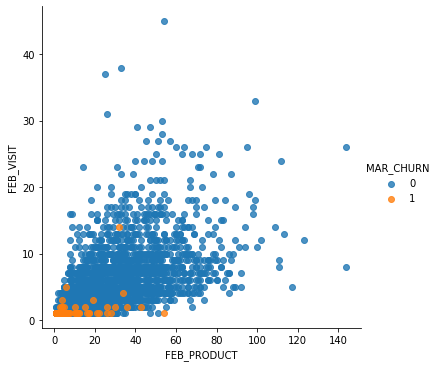

In [79]:
import seaborn as sns

ax = sns.lmplot( x="FEB_PRODUCT", y="FEB_VISIT", data=df, fit_reg=False, hue='MAR_CHURN', legend=True)
df['MAR_CHURN'].value_counts()

In [60]:
x = df.iloc[:,1:-1]
x.head(5)

,FEB_VISIT,FEB_PRODUCT,FEB_STORE
0,3,8,1
1,5,46,2
2,1,22,1
3,1,2,1
4,5,14,1


In [61]:
y = df.iloc[:,-1:]
y.head(5)

,MAR_CHURN
0,0
1,0
2,0
3,0
4,0


In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

MAR_CHURN
0            1350
1              35
dtype: int64
MAR_CHURN
0            1350
1              36
dtype: int64


'churn.pdf'

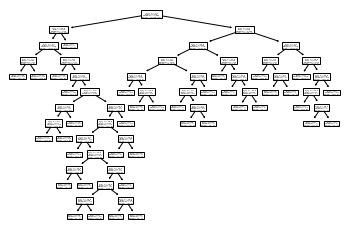

In [94]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

tree.plot_tree(clf) 

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("churn") 

In [97]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)

confusion_matrix_train = confusion_matrix(y_test, y_pred)
print(confusion_matrix_train)

TrueNegative = confusion_matrix_train[0,0]
print("TN=",TrueNegative)
FalseNegative = confusion_matrix_train[0,1]
print("FN=",FalseNegative)
FalsePositive = confusion_matrix_train[1,0]
print("FP=",FalsePositive)
TruePositive = confusion_matrix_train[1,1]
print("TP=",TruePositive)

from sklearn.metrics import classification_report

target_names = ['churn', 'come back']
print(classification_report(y_test, y_pred, target_names=target_names))



[[1349    1]
 [  36    0]]
TN= 1349
FN= 1
FP= 36
TP= 0
              precision    recall  f1-score   support

       churn       0.97      1.00      0.99      1350
   come back       0.00      0.00      0.00        36

    accuracy                           0.97      1386
   macro avg       0.49      0.50      0.49      1386
weighted avg       0.95      0.97      0.96      1386

